In [221]:
import tensorflow as tf 
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [222]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [223]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
)

Found 2152 files belonging to 3 classes.


In [224]:
class_names = dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [225]:
len(dataset)

68

In [226]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())   

(32, 256, 256, 3)
[2 0 1 0 0 0 0 0 0 1 0 0 1 2 1 1 0 0 1 1 1 0 2 0 0 0 0 0 2 1 1 1]


In [227]:
for image_batch, labels in dataset.take(1):
    print(image_batch[0].numpy().shape)

(256, 256, 3)


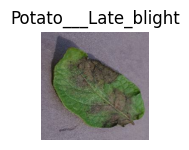

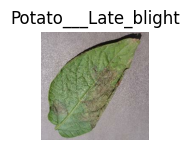

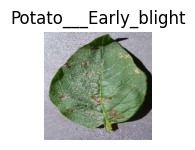

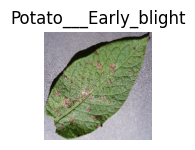

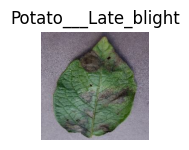

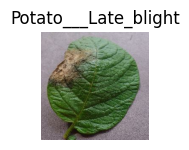

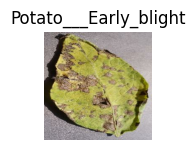

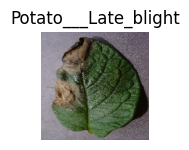

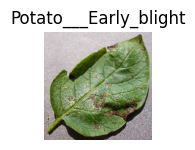

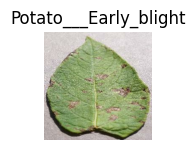

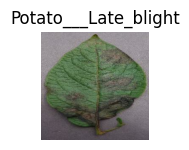

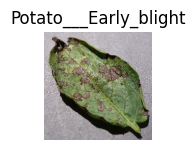

ValueError: num must be an integer with 1 <= num <= 12, not 13

<Figure size 640x480 with 0 Axes>

In [228]:
for image_batch, label_batch in dataset.take(1):
    for i in range(20):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])
        plt.show()

In [ ]:
len(dataset)

68

In [ ]:
# 80% ==> training
#20% ==> 10% validation, 10% Text

In [ ]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds= dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds= dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds= test_ds.take(6)
len(val_ds)


6

In [ ]:
test_ds= test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split + test_split) == 1

    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    return train_ds, val_ds, test_ds


In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds), len(val_ds), len(test_ds)

(54, 6, 8)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = tf.keras.Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
    Rescaling(1./255)
])


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(164, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))


In [ ]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_12 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 164)            │        42,148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,747 (819.32 KB)

 Trainable params: 209,747 (819.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    
    epochs=10,
    verbose=1,
    
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 461ms/step - accuracy: 0.4205 - loss: 0.9724 - val_accuracy: 0.4896 - val_loss: 0.8710
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 457ms/step - accuracy: 0.5188 - loss: 0.8395 - val_accuracy: 0.7344 - val_loss: 0.5996
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 449ms/step - accuracy: 0.8010 - loss: 0.5213 - val_accuracy: 0.8906 - val_loss: 0.3343
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 457ms/step - accuracy: 0.7977 - loss: 0.4672 - val_accuracy: 0.9375 - val_loss: 0.2172
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 461ms/step - accuracy: 0.8644 - loss: 0.3378 - val_accuracy: 0.9219 - val_loss: 0.2106
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 458ms/step - accuracy: 0.9204 - loss: 0.2393 - val_accuracy: 0.9479 - val_loss: 0.1347
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 467ms/step - accuracy: 0.9044 - loss: 0.2195 - val_accuracy: 0.9427 - val_loss: 0.1378
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 456ms/step - accuracy: 0.8799 - loss: 0.2526 - val_accu

In [ ]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9615 - loss: 0.1249


In [ ]:
scores

[0.12197370827198029, 0.95703125]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

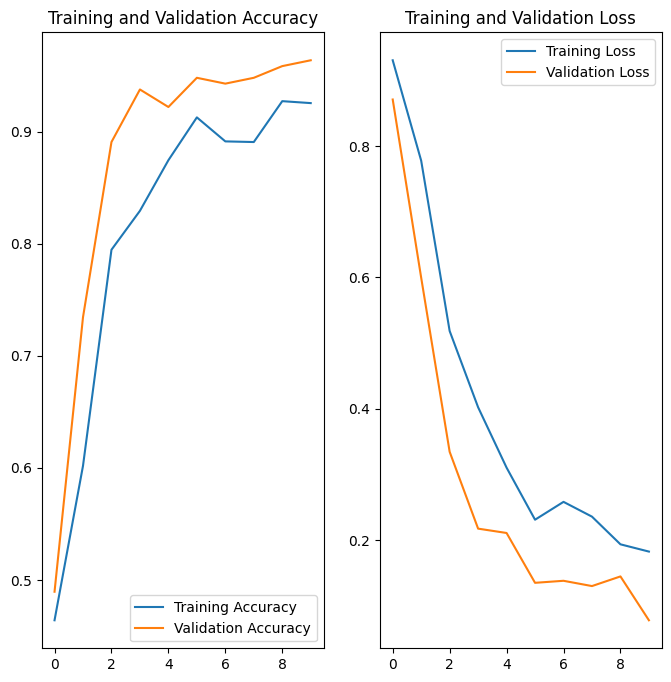

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label:  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
predicted label :  Potato___Late_blight


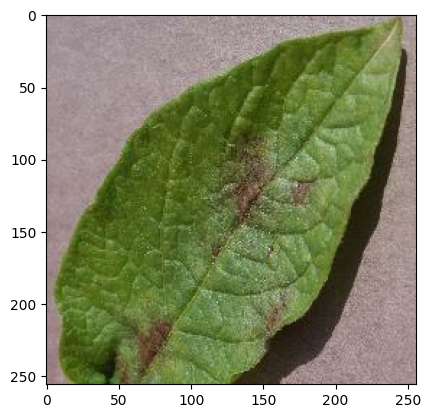

In [ ]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    
    for image_batch, label_batch in test_ds.take(1):
        
        first_image = image_batch[0].numpy().astype("uint8")
        first_label = label_batch[0].numpy()
        
        print("first image to predict")
        plt.imshow(first_image)
        print("actual label: ", class_names[first_label])
        
        batch_prediction = model.predict(image_batch)
        print("predicted label : ",class_names[np.argmax (batch_prediction[0])])